## Train a model with bike rental data using XGBoost algorithm
### Training log1p(count) dataset
###  Model is trained with XGBoost installed in notebook instance
###  In the later examples, we will train using SageMaker's XGBoost algorithm

In [1]:
# Install xgboost in notebook instance.
#### Command to install xgboost
!pip install xgboost

In [2]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# XGBoost 
import xgboost as xgb

In [3]:
train_file = 'bike-sharing-demand/bike_train.csv'
validation_file = 'bike-sharing-demand/bike_validation.csv'
test_file = 'bike-sharing-demand/bike_test.csv'
column_list_file = 'bike-sharing-demand/bike_train_column_list.txt'

In [4]:
columns = ''
with open(column_list_file,'r') as f:
    columns = f.read().split(',')

In [5]:
columns

['count',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'month',
 'day',
 'dayofweek',
 'hour']

In [6]:
# Specify the column names as the file does not have column header
df_train = pd.read_csv(train_file,names=columns)
df_validation = pd.read_csv(validation_file,names=columns)

In [7]:
df_train.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,4.477337,3,0,0,2,26.24,30.305,73,7.0015,2011,9,3,5,0
1,5.517453,3,0,1,1,32.80,34.850,33,7.0015,2012,8,13,0,14
2,5.814131,4,0,0,1,15.58,19.695,40,11.0014,2011,11,5,5,17
3,6.436150,3,0,1,1,32.80,37.880,55,12.9980,2012,8,9,3,19
4,4.262680,2,0,1,1,13.94,17.425,76,7.0015,2011,4,14,3,6


In [8]:
df_validation.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,6.095825,3,0,1,2,28.70,33.335,79,12.9980,2011,7,7,3,8
1,5.961005,2,0,0,1,32.80,37.880,55,12.9980,2011,6,11,5,13
2,1.098612,1,0,1,1,14.76,16.665,40,19.9995,2011,2,14,0,2
3,3.891820,1,0,1,1,9.02,9.090,47,36.9974,2011,2,8,1,10
4,4.025352,4,0,0,1,10.66,15.150,87,0.0000,2011,12,4,6,8


In [9]:
X_train = df_train.iloc[:,1:] # Features: 1st column onwards 
y_train = df_train.iloc[:,0].ravel() # Target: 0th column

X_validation = df_validation.iloc[:,1:]
y_validation = df_validation.iloc[:,0].ravel()

In [10]:
# XGBoost Training Parameter Reference: 
#   https://github.com/dmlc/xgboost/blob/master/doc/parameter.md
#regressor = xgb.XGBRegressor(max_depth=5,eta=0.1,subsample=0.7,num_round=150)
regressor = xgb.XGBRegressor(max_depth=5,n_estimators=150)

In [11]:
regressor

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=150, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [12]:
regressor.fit(X_train,y_train, eval_set = [(X_train, y_train), (X_validation, y_validation)])

[0]	validation_0-rmse:3.06460	validation_1-rmse:3.07128
[1]	validation_0-rmse:2.18561	validation_1-rmse:2.18977
[2]	validation_0-rmse:1.57973	validation_1-rmse:1.58729
[3]	validation_0-rmse:1.15916	validation_1-rmse:1.16584
[4]	validation_0-rmse:0.86291	validation_1-rmse:0.87348
[5]	validation_0-rmse:0.67593	validation_1-rmse:0.68940
[6]	validation_0-rmse:0.55710	validation_1-rmse:0.57295
[7]	validation_0-rmse:0.47210	validation_1-rmse:0.49133
[8]	validation_0-rmse:0.41153	validation_1-rmse:0.43610
[9]	validation_0-rmse:0.37590	validation_1-rmse:0.40111
[10]	validation_0-rmse:0.34717	validation_1-rmse:0.37443
[11]	validation_0-rmse:0.33554	validation_1-rmse:0.36382
[12]	validation_0-rmse:0.32311	validation_1-rmse:0.35253
[13]	validation_0-rmse:0.31561	validation_1-rmse:0.34656
[14]	validation_0-rmse:0.31065	validation_1-rmse:0.34307
[15]	validation_0-rmse:0.30379	validation_1-rmse:0.33729
[16]	validation_0-rmse:0.30120	validation_1-rmse:0.33574
[17]	validation_0-rmse:0.29738	validation

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=150, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [13]:
df_train['count'].describe()

count    7620.000000
mean        4.583886
std         1.429959
min         0.693147
25%         3.737670
50%         4.976734
75%         5.652489
max         6.885510
Name: count, dtype: float64

In [14]:
eval_result = regressor.evals_result()

In [15]:
training_rounds = range(len(eval_result['validation_0']['rmse']))

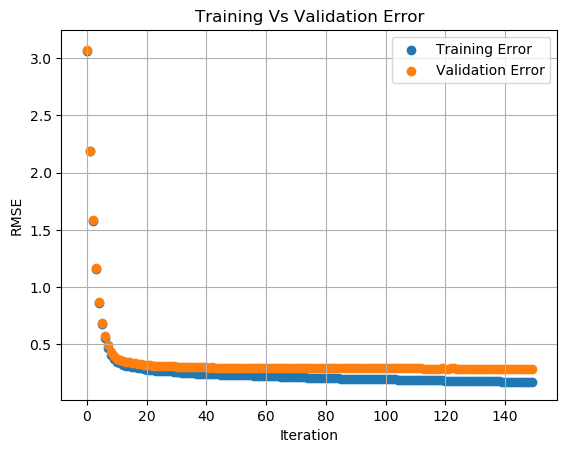

In [16]:
plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error')
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.title('Training Vs Validation Error')
plt.legend()
plt.show()

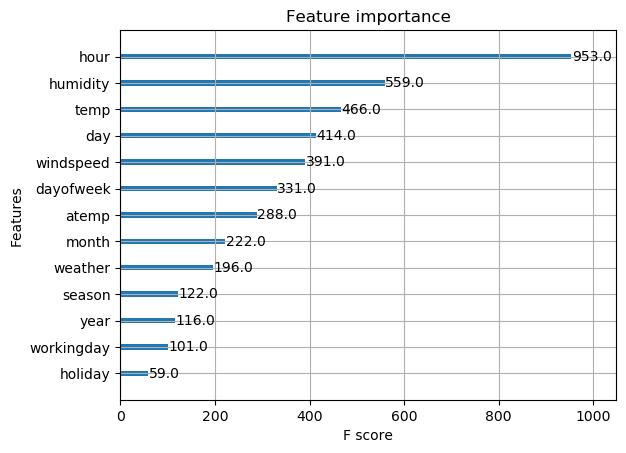

In [17]:
xgb.plot_importance(regressor)
plt.show()

In [18]:
# Updated - Changed to validation dataset
# Compare actual vs predicted performance with dataset not seen by the model before
df = pd.read_csv(validation_file,names=columns)

In [19]:
df.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,6.095825,3,0,1,2,28.70,33.335,79,12.9980,2011,7,7,3,8
1,5.961005,2,0,0,1,32.80,37.880,55,12.9980,2011,6,11,5,13
2,1.098612,1,0,1,1,14.76,16.665,40,19.9995,2011,2,14,0,2
3,3.891820,1,0,1,1,9.02,9.090,47,36.9974,2011,2,8,1,10
4,4.025352,4,0,0,1,10.66,15.150,87,0.0000,2011,12,4,6,8


In [20]:
X_test = df.iloc[:,1:]
print(X_test[:5])

   season  holiday  workingday  weather   temp   atemp  humidity  windspeed  \
0       3        0           1        2  28.70  33.335        79    12.9980   
1       2        0           0        1  32.80  37.880        55    12.9980   
2       1        0           1        1  14.76  16.665        40    19.9995   
3       1        0           1        1   9.02   9.090        47    36.9974   
4       4        0           0        1  10.66  15.150        87     0.0000   

   year  month  day  dayofweek  hour  
0  2011      7    7          3     8  
1  2011      6   11          5    13  
2  2011      2   14          0     2  
3  2011      2    8          1    10  
4  2011     12    4          6     8  


In [21]:
result = regressor.predict(X_test)

In [22]:
result[:5]

array([6.259567 , 5.966802 , 1.3931606, 3.9536645, 4.000689 ],
      dtype=float32)

In [23]:
df.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,6.095825,3,0,1,2,28.70,33.335,79,12.9980,2011,7,7,3,8
1,5.961005,2,0,0,1,32.80,37.880,55,12.9980,2011,6,11,5,13
2,1.098612,1,0,1,1,14.76,16.665,40,19.9995,2011,2,14,0,2
3,3.891820,1,0,1,1,9.02,9.090,47,36.9974,2011,2,8,1,10
4,4.025352,4,0,0,1,10.66,15.150,87,0.0000,2011,12,4,6,8


In [24]:
df['count_predicted'] = result

In [25]:
df.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count_predicted
0,6.095825,3,0,1,2,28.70,33.335,79,12.9980,2011,7,7,3,8,6.259567
1,5.961005,2,0,0,1,32.80,37.880,55,12.9980,2011,6,11,5,13,5.966802
2,1.098612,1,0,1,1,14.76,16.665,40,19.9995,2011,2,14,0,2,1.393161
3,3.891820,1,0,1,1,9.02,9.090,47,36.9974,2011,2,8,1,10,3.953665
4,4.025352,4,0,0,1,10.66,15.150,87,0.0000,2011,12,4,6,8,4.000689


In [26]:
# Negative Values are predicted
df['count_predicted'].describe()

count    3266.000000
mean        4.592924
std         1.380849
min         0.626428
25%         3.790787
50%         4.991671
75%         5.625294
max         6.830800
Name: count_predicted, dtype: float64

In [27]:
df[df['count_predicted'] < 0]

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count_predicted


In [28]:
def adjust_count(x):
    if x < 0:
        return 0
    else:
        return x

In [29]:
df['count_predicted'] = df['count_predicted'].map(adjust_count)

In [30]:
df[df['count_predicted'] < 0]

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count_predicted


In [31]:
df['count'] = df['count'].map(np.expm1)
df['count_predicted'] = df['count_predicted'].map(np.expm1)

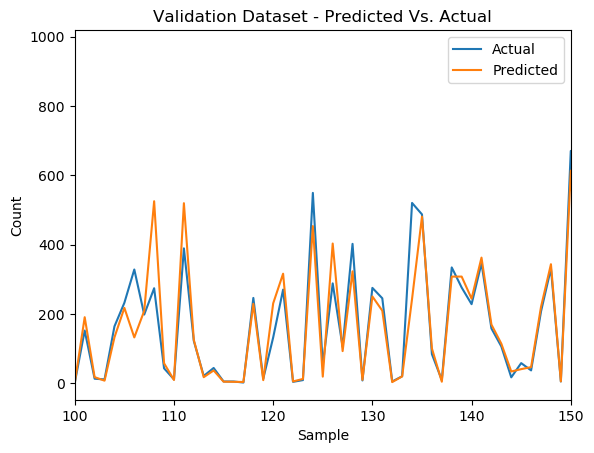

In [32]:
# Actual Vs Predicted
plt.plot(df['count'], label='Actual')
plt.plot(df['count_predicted'],label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Count')
plt.xlim([100,150])
plt.title('Validation Dataset - Predicted Vs. Actual')
plt.legend()
plt.show()

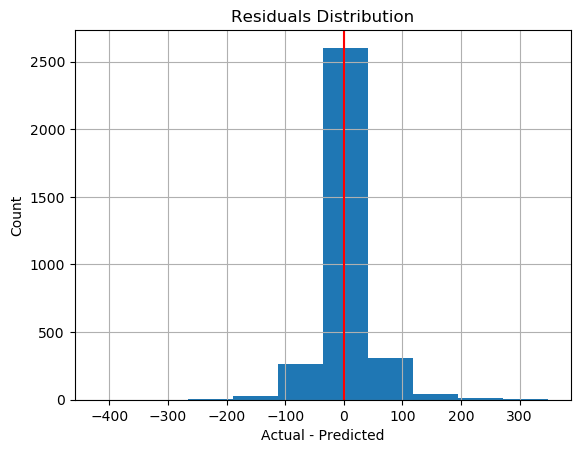

In [33]:
# Over prediction and Under Prediction needs to be balanced
# Training Data Residuals
residuals = (df['count'] - df['count_predicted'])

plt.hist(residuals)
plt.grid(True)
plt.xlabel('Actual - Predicted')
plt.ylabel('Count')
plt.title('Residuals Distribution')
plt.axvline(color='r')
plt.show()

In [34]:
value_counts = (residuals > 0).value_counts(sort=False)
print(' Under Estimation: {0:.2f}'.format(value_counts[True]/len(residuals)))
print(' Over  Estimation: {0:.2f}'.format(value_counts[False]/len(residuals)))

 Under Estimation: 0.53
 Over  Estimation: 0.47


In [35]:
import sklearn.metrics as metrics
print("RMSE: {0:.2f}".format(metrics.mean_squared_error(df['count'],
                                                    df['count_predicted'])**.5))

RMSE: 42.41


In [36]:
# Metric Use By Kaggle
def compute_rmsle(y_true, y_pred):
    if type(y_true) != np.ndarray:
        y_true = np.array(y_true)
        
    if type(y_pred) != np.ndarray:
        y_pred = np.array(y_pred)
     
    return(np.average((np.log1p(y_pred) - np.log1p(y_true))**2)**.5)

In [37]:
print("RMSLE: {0:.2f}".format(compute_rmsle(df['count'],df['count_predicted'])))

RMSLE: 0.29


In [38]:
# Prepare Data for Submission to Kaggle
df_test = pd.read_csv(test_file,parse_dates=['datetime'])

In [39]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4


In [40]:
X_test =  df_test.iloc[:,1:] # Exclude datetime for prediction

In [41]:
X_test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4


In [42]:
result = regressor.predict(X_test)

In [43]:
result[:5]

array([2.0552852, 1.5469345, 1.3397862, 1.1393155, 1.051079 ],
      dtype=float32)

In [44]:
np.expm1(result)

array([  6.809065 ,   3.6970491,   2.818227 , ..., 125.76962  ,
        86.26166  ,  44.861454 ], dtype=float32)

In [45]:
# Convert result to actual count
df_test["count"] = np.expm1(result)

In [46]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,0,6.809065
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1,3.697049
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2,2.818227
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3,2.124629
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4,1.860736


In [47]:
df_test[df_test["count"] < 0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count


In [48]:
df_test[['datetime','count']].to_csv('bike-sharing-demand/predicted_count.csv',index=False)

In [49]:
# RMSLE (Kaggle) Score
# Test 1: 0.62
# Test 2(log of count): 0.40